<a href="https://colab.research.google.com/github/avinashdhakne/Covi-Bot-A-intent-based-Covid-19-information-chatbot/blob/main/prophet_AQI_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet

  Using cached prophet-1.0.1.tar.gz (65 kB)
  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Using cached ujson-5.1.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43 kB)
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639922 sha256=a2c4059e010d188f84bcfb4150fc68c78dbe910d9a6b55fb363390aa168e49a8
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [5]:
data = pd.read_csv("city_day.csv")
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [6]:
data1 = data.loc[data['City'] == "Delhi"]
data1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [7]:
col_names = []
for column in data1:
  col_names.append(column)

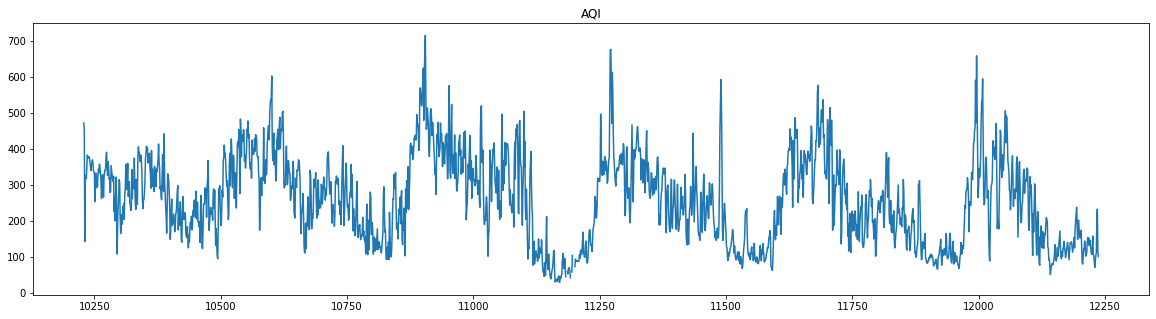

In [8]:
plt.figure(figsize=(20,5))
plt.plot(data1["AQI"])
plt.title("AQI")
plt.show()

# **FaceBook Prophet**

In [9]:
pred_days = 7

In [10]:
from sklearn.model_selection import train_test_split
ds, x_test, y, y_test = train_test_split(data1["Date"], data1["AQI"], test_size=pred_days, random_state=0)

In [11]:
ds = np.array(ds)
y = np.array(y)

In [12]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [13]:
df = pd.DataFrame(ds)
df.columns = ["ds"]
df['y'] = y
df.head()

,ds,y
0,2018-03-16,269.0
1,2020-01-06,335.0
2,2015-03-18,191.0
3,2017-08-24,58.0
4,2017-04-08,497.0


In [14]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = model.make_future_dataframe(periods=10)
future.tail()

,ds
2007,2020-07-07
2008,2020-07-08
2009,2020-07-09
2010,2020-07-10
2011,2020-07-11


In [16]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2007,2020-07-07,46.507732,-38.774290,133.852472
2008,2020-07-08,49.019983,-29.505346,135.709876
2009,2020-07-09,50.405263,-39.840681,134.971207
2010,2020-07-10,51.138803,-35.903424,146.146094
2011,2020-07-11,44.471801,-42.082580,134.670720


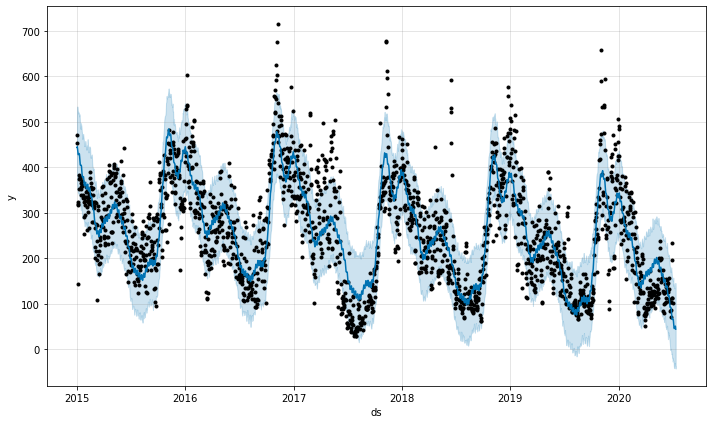

In [17]:
fig1 = model.plot(forecast)

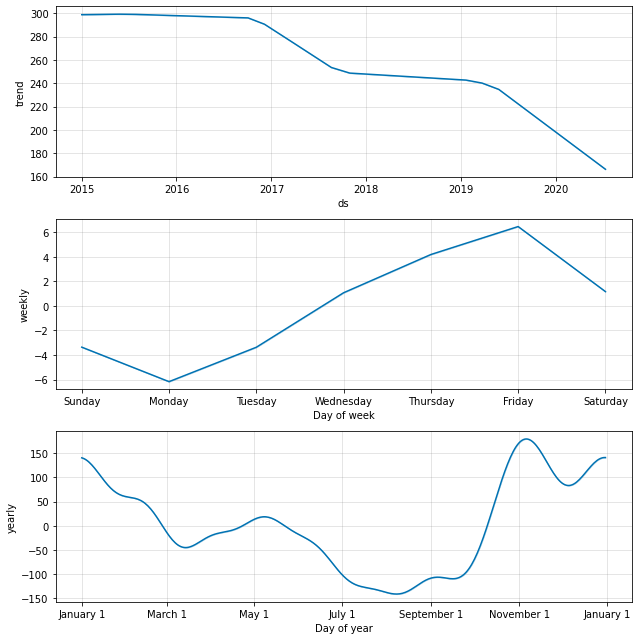

In [18]:
fig2 = model.plot_components(forecast)

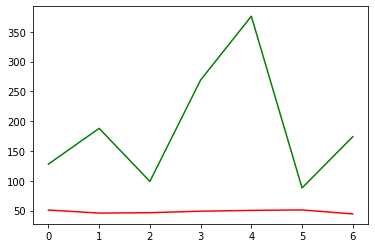

In [19]:
# original data vs predicted data
plt.plot(np.array(forecast["yhat"][-pred_days:]).reshape(-1,1), color="red")
plt.plot(y_test, color="Green")